## Problem Statement : 
### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Dataset Link
#### https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv("Bank.csv",delimiter=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
BankData=data
BankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### It is mentioned in the description that if pdays means 999 than it means the customer was not contacted before

In [6]:
#sns.histplot(BankData["pdays"])

#### It seems that most of the customers are there who have not been contacted earlier and very few which are contacted earlier ,So this numeric variable can be changed in previously contacted yes and no options

In [7]:
#previous column is confusing it means no of times a customer is contacted before the campaign so let's rename it
#campaign column tells no of times a customer contacted during the campaign so let's rename it
BankData.rename(columns={"campaign":"Previous_Contacts"},inplace=True)

In [8]:
df = BankData

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'Previous_Contacts',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Previous_Contacts,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### It looks fine till now. Let's go for Univariate Analysis

In [11]:
#sns.boxplot(BankData["age"])

In [12]:
#sns.histplot(BankData["age"])

In [13]:
#df["age"].describe()

### Observations - Age:
1. It doesn't look like normal distribution and having some outliers also
2. Some transformation can be applied which we will try later on
3. Average age of the participants in this campaign is around 40 and there are more people in the age range of 30-40
4. Although outliers are present there like age more than 70 but if we think than we can not simply ignore these because many senior citizens might take the plans by considering future of their kids or grandchildren . So simply dropping it would not be a great idea as of now. Let's see what we do later

In [14]:
#BankData["job"].value_counts()

In [15]:
#BankData["job"].value_counts().plot.bar()

### Observation - Job:
1. more than 25% people belongs to administration
2. Most people contacted in this campaign belong to administratiion, technician or blue collar job (~63%)
3. Entrepreneur,housemaid,unemployed,student and unknown are less in numbers so we can create a simple other combined class while model building to avoid so many variables but that will be done later on

In [16]:
#BankData["marital"].value_counts()

In [17]:
#BankData["marital"].value_counts().plot.bar()

### Observation Marital Status:
1. Most people contacted in this campaign are married people
2. There are few cases of unknown which either can be droopped or can be merged with divorced and we can create complicated column. 

In [18]:
#BankData["education"].value_counts()

In [19]:
#BankData["education"].value_counts().plot.bar()

### Observation - Education:
1. Around 30% people have university degree and around 18 % are very less educated or uneducated
2. More than 50% people have education greater than or equals higher school
3. Here also the 18 % can be merged as a single class to avoid too many variables

In [20]:
#BankData["default"].value_counts()

In [21]:
#BankData["housing"].value_counts()

In [22]:
#BankData["housing"].value_counts().plot.bar()

In [23]:
#BankData["loan"].value_counts()

In [24]:
#BankData["loan"].value_counts().plot.bar()

### Observation - Defaulter, Housing & Personal Loans
1. Almost 80% people don't have personal loan
2. we will later on also check how many people have personal and housing loan both together
3. Good mixture of people who have housing loan and it might be an important feature while deciding to subscribe for policy
4. Almost no one is defaulter, and it makes sense
5. The unknown also have a significant number for defaulter and it should be investigated.

In [25]:
#BankData["contact"].value_counts().plot.bar()

In [26]:
#BankData["month"].value_counts().plot.bar()

In [27]:
#BankData["day_of_week"].value_counts().plot.bar()

### Observations - Contacts:
1. Most people contacted in May month followed by July, August and June.
2. More than 60% people contacted via cellular phone call.
3. Contacts done are usually done on all weekdays in similar frequency

<Axes: ylabel='Frequency'>

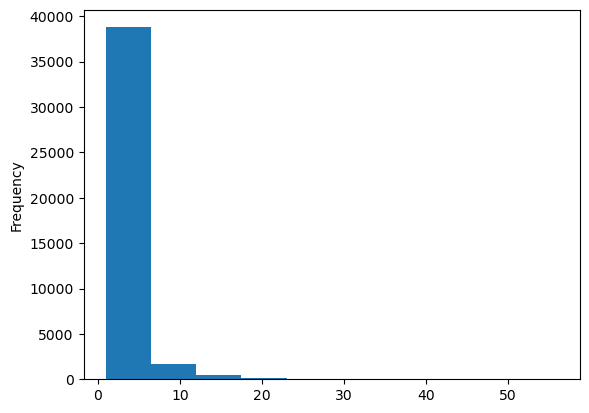

In [28]:
BankData["Previous_Contacts"].plot.hist()

### there is a clear uncertainty for number of calls done in the campaign

In [29]:
#BankData["poutcome"].value_counts().plot.bar()

In [30]:
# Because most things are non-existant so I am dropping it
#BankData.drop(["poutcome"],axis=1,inplace=True)

In [31]:
#BankData["PreviouslyContact"].value_counts().plot.bar()

In [32]:
#BankData["PreviouslyContact"].value_counts()

In [33]:
df = BankData

### Time for Bi and Multivariate Analysis

#### I will do it based on the questions one can get while thinking about the dataset and problem statement

#### Q1 . Does age affecting the subscription chances of customers ?

<Axes: xlabel='age', ylabel='Count'>

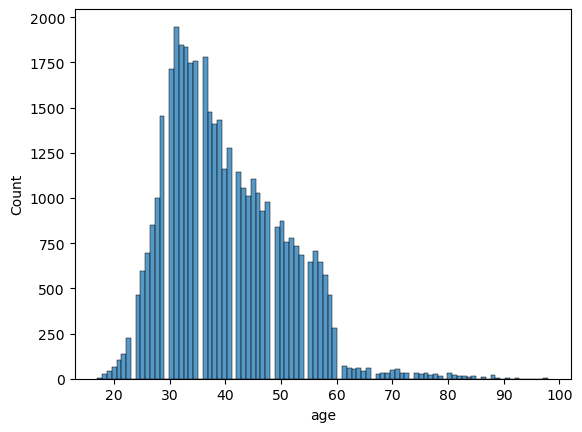

In [34]:
sns.histplot(df,x='age')

#### Observation : People taking subscription are mostly from age range 25 to 40 but the conversion but as everyone is contacted atleast once during this campaign the conversion is also low in the same age group. While the conversion of call to successful subscription looks descent in senior citizens group ie >60 age.

In [39]:
df['log_age'] = np.log(df['age'])

In [41]:
df["Any_Loans"] = df["housing"]+df["loan"]

In [42]:
df["Any_Loans"].replace(["yesno","noyes","yesyyes"],"yes",inplace=True)
df["Any_Loans"].replace(["nono",],"no",inplace=True)

In [38]:
print(maheshanjali)

NameError: name 'maheshanjali' is not defined

#### Q2. What if we combine age,job and education and compare it with decision of taking subscription.

In [ ]:
job_group = df.groupby('job')

In [ ]:
education_group = df.groupby('education')

In [ ]:
len(job_group),len(education_group)

In [ ]:
#job_group.size(),education_group.size()

In [ ]:
job_group['y'].value_counts().plot.bar()

In [ ]:
education_group['y'].value_counts().plot.bar()

In [ ]:
marital_group = df.groupby('marital')
contact_group = df.groupby('contact')

In [ ]:
marital_group['y'].value_counts().plot.bar()

In [ ]:
contact_group['y'].value_counts().plot.bar()

In [ ]:
month_group = df.groupby('month')
month_group['y'].value_counts().plot.bar()

In [ ]:
day_group = df.groupby('day_of_week')
day_group['y'].value_counts().plot.bar()

In [ ]:
df.head()

In [ ]:
personalloan_group = df.groupby('loan')
housingloan_group = df.groupby('housing')

In [ ]:
personalloan_group['y'].value_counts().plot.bar()

In [ ]:
housingloan_group['y'].value_counts().plot.bar()

In [ ]:
prv_contacted_group = df.groupby('PreviouslyContact')
prv_contacted_group['y'].value_counts().plot.bar()

In [ ]:
df['duration'] = df['duration']/60

In [ ]:
c1 = df[['housing','loan']]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
one_hot_data = pd.get_dummies(c1[['housing','loan']],drop_first=True)
clf=clf.fit(one_hot_data, df['y'])

In [ ]:
tree.plot_tree(clf)

In [43]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,log_age,Any_Loans
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,no


In [44]:
#i am dropping multiple columns

dropped_labels = ['age','contact','pdays','default','housing','loan','poutcome','previous','cons.price.idx','duration','cons.conf.idx','euribor3m','nr.employed']
df.drop(dropped_labels,axis=1,inplace=True)

In [45]:
df.head(1)

,job,marital,education,month,day_of_week,Previous_Contacts,emp.var.rate,y,log_age,Any_Loans
0,housemaid,married,basic.4y,may,mon,1,1.1,no,4.025352,no


In [51]:
df.drop('emp.var.rate',axis=1,inplace=True)

In [52]:
df.head(1)

,job,marital,education,month,day_of_week,Previous_Contacts,y,log_age,Any_Loans
0,housemaid,married,basic.4y,may,mon,1,no,4.025352,no


In [53]:
# I am merging some classes together
df['education'] = df['education'].replace(['basic.4y','basic.6y','basic.9y'],'elementary')
df['y'] = df['y'].replace(['no'],0)
df['y'] = df['y'].replace(['yes'],1)

In [ ]:
df.head()

In [ ]:
print(maheshanjali)

In [54]:
df['Month'] = df['month']
df['Month'] = df['Month'].replace(['jan','feb','mar'],'First_Quarter')
df['Month'] = df['Month'].replace(['apr','may','jun'],'Second_Quarter')
df['Month'] = df['Month'].replace(['jul','aug','sep'],'Third_Quarter')
df['Month'] = df['Month'].replace(['oct','nov','dec'],'Fourth_Quarter')
df.drop('month',axis=1,inplace=True)

In [ ]:
df.head(3)

In [ ]:
df['Month'].value_counts()

In [55]:
x = df.drop('y',axis=1)
y = df['y']

In [ ]:
x

In [ ]:
y

In [56]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.15,random_state=6,stratify=y)

In [57]:
x_train.shape, x_test.shape

((35009, 8), (6179, 8))

In [58]:
y_train.shape, y_test.shape

((35009,), (6179,))

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [62]:
x_train.head(1)

,job,marital,education,day_of_week,Previous_Contacts,log_age,Any_Loans,Month
15451,admin.,divorced,university.degree,fri,1,3.806662,no,Third_Quarter


In [63]:
ohe = OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore')
ohe.fit(x_train[['job','marital','education','day_of_week',
                                 'Month','Any_Loans']])
x_train_transformed = ohe.transform(x_train[['job','marital','education','day_of_week',
                                 'Month','Any_Loans']])
x_test_transformed =  ohe.transform(x_test[['job','marital','education','day_of_week',
                                 'Month','Any_Loans']])

C:\Users\MAHES\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
x_train_transformed.shape,y_train.shape

((35009, 29), (35009,))

In [65]:
from sklearn.model_selection import cross_val_score

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train_transformed,y_train)
pred1 = DT.predict(x_test_transformed)
print(recall_score(np.array(y_test),pred1))

In [ ]:
RF =RandomForestClassifier(bootstrap=True,
 max_depth= 40,
 min_samples_leaf=5,
 n_estimators= 200)
cross_val_recall = cross_val_score(RF,x_train_transformed,y_train,cv=5,scoring='recall')
RF.fit(x_train_transformed,y_train)
pred1 = RF.predict(x_test_transformed)
print(recall_score(y_test,pred1))
print(cross_val_recall.mean())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
params={
'bootstrap': [True],
    'max_depth': [i*10 for i in range(1,5)],
    'min_samples_leaf': [5,10,15],
    'n_estimators': [50,100,150,200],
}

In [ ]:
grid_search = GridSearchCV(estimator = RF, param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train_transformed, y_train)

In [ ]:
grid_search.best_params_

In [66]:
XX =XGBClassifier()
cross_val_recall = cross_val_score(XX,x_train_transformed,y_train,cv=10,scoring='recall')
XX.fit(x_train_transformed,y_train)
pred1 = XX.predict(x_test_transformed)
print(recall_score(y_test,pred1))
print(cross_val_recall.mean())

0.05028735632183908
0.04994281308231061


In [67]:
from sklearn.naive_bayes import CategoricalNB

In [68]:
CNB = CategoricalNB()

In [69]:
cross_val_recall = cross_val_score(CNB,x_train_transformed,y_train,cv=5,scoring='recall')
CNB.fit(x_train_transformed,y_train)
pred2 = CNB.predict(x_test_transformed)
print(recall_score(y_test,pred1))
print(cross_val_recall.mean())

0.05028735632183908
0.01926971749885803


In [70]:
NB = GaussianNB()
cross_val_recall = cross_val_score(NB,x_train_transformed,y_train,cv=10,scoring='recall')
NB.fit(x_train_transformed,y_train)
pred2 = NB.predict(x_test_transformed)
print(recall_score(y_test,pred1))
print(cross_val_recall.mean())

0.05028735632183908
0.19599820086101652


In [ ]:
print(mahesh)

In [ ]:
x_train.head(1)

In [ ]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3,4,5,8,9])
],remainder='passthrough')

In [ ]:
step2_LR = LogisticRegression()
step2_DT  =DecisionTreeClassifier()
step2_RF = RandomForestClassifier()
step2_NB = GaussianNB()
step2_GBM =GradientBoostingClassifier()
step2_XGB = XGBClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

### Pipeline 

In [ ]:
pipe_LR = Pipeline([
    ('step1',step1),
    ('step2',step2_LR)
])

In [ ]:
pipe_LR.fit(x_train,y_train)

In [ ]:
y_pred_LR = pipe_LR.predict(x_test)

In [ ]:
cv_score = cross_val_score(pipe_LR,x_train,y_train,scoring='recall')
LR_acc = accuracy_score(y_test,y_pred_LR)
LR_recall = recall_score(y_test,y_pred_LR)
LR_pre = precision_score(y_test,y_pred_LR)
LR_f1 = f1_score(y_test,y_pred_LR)
print("            Logistic Regression              ")
print()
print("Accuracy:",LR_acc)
print("Recall:",LR_recall)
print("Precision:",LR_pre)
print("F1:",LR_f1)
print()
print(cv_score.mean())


In [ ]:
pipe_DT = Pipeline([
    ('step1',step1),
    ('step2',step2_DT)
])

In [ ]:
pipe_DT.fit(x_train,y_train)

In [ ]:
y_pred_DT = pipe_DT.predict(x_test)

In [ ]:
cv_score = cross_val_score(pipe_DT,x_train,y_train,cv=5,scoring='recall')
DT_acc = accuracy_score(y_test,y_pred_DT)
DT_recall = recall_score(y_test,y_pred_DT)
DT_pre = precision_score(y_test,y_pred_DT)
DT_f1 = f1_score(y_test,y_pred_DT)
print("            Decision Tree             ")
print()
print("Accuracy:",DT_acc)
print("Recall:",DT_recall)
print("Precision:",DT_pre)
print("F1:",DT_f1)
print("CV recall",cv_score.mean())
print()


In [ ]:
pipe_RF = Pipeline([
    ('step1',step1),
    ('step2',step2_RF)
])

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
pipe_RF.fit(x_train,y_train)

In [ ]:
cv_score = cross_val_score(pipe_RF,x_train,y_train,cv=5,scoring='recall')
y_pred_RF = pipe_RF.predict(x_test)
RF_acc = accuracy_score(y_test,y_pred_RF)
RF_recall = recall_score(y_test,y_pred_RF)
RF_pre = precision_score(y_test,y_pred_RF)
RF_f1 = f1_score(y_test,y_pred_RF)
print("            Random Forest             ")
print()
print("Accuracy:",RF_acc)
print("Recall:",RF_recall)
print("Precision:",RF_pre)
print("F1:",RF_f1)
print()
print(cv_score.mean())

In [ ]:
pipe_NB = Pipeline([
    ('step1',step1),
    ('step2',step2_NB)
])

In [ ]:
pipe_NB.fit(x_train,y_train)

In [ ]:
cv_score = cross_val_score(pipe_NB,x_train,y_train,cv=5,scoring='recall')
y_pred_NB = pipe_NB.predict(x_test)
NB_acc = accuracy_score(y_test,y_pred_NB)
NB_recall = recall_score(y_test,y_pred_NB)
NB_pre = precision_score(y_test,y_pred_NB)
NB_f1 = f1_score(y_test,y_pred_NB)
print("            Naive Bayes             ")
print()
print("Accuracy:",NB_acc)
print("Recall:",NB_recall)
print("Precision:",NB_pre)
print("F1:",NB_f1)
print("cv score:recall",cv_score.mean())

In [ ]:
pipe_GBM = Pipeline([
    ('step1',step1),
    ('step2',step2_GBM)
])

In [ ]:
pipe_GBM.fit(x_train,y_train)

In [ ]:
y_pred_GBM = pipe_GBM.predict(x_test)
GBM_acc = accuracy_score(y_test,y_pred_GBM)
GBM_recall = recall_score(y_test,y_pred_GBM)
GBM_pre = precision_score(y_test,y_pred_GBM)
GBM_f1 = f1_score(y_test,y_pred_GBM)
print("         GBM            ")
print()
print("Accuracy:",GBM_acc)
print("Recall:",GBM_recall)
print("Precision:",GBM_pre)
print("F1:",GBM_f1)
print()

In [ ]:
pipe_XGB = Pipeline([
    ('step1',step1),
    ('step2',step2_XGB)
])

pipe_XGB.fit(x_train,y_train)
cv_score = cross_val_score(pipe_XGB,x_train,y_train,cv=10,scoring='recall')
y_pred_XGB = pipe_XGB.predict(x_test)
XGB_acc = accuracy_score(y_test,y_pred_XGB)
XGB_recall = recall_score(y_test,y_pred_XGB)
XGB_pre = precision_score(y_test,y_pred_XGB)
XGB_f1 = f1_score(y_test,y_pred_XGB)
print("            XGB             ")
print()
print("Accuracy:",XGB_acc)
print("Recall:",XGB_recall)
print("Precision:",XGB_pre)
print("F1:",XGB_f1)
print("cv xgb",cv_score.mean())
print()

### Exporting the model

In [ ]:
# import pickle
# pickle.dump(pipe_GBM,open('model.pkl','wb'))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)